# Compensation Coil for lab 305.
Judi Parvizinejad, Celeste, Sebastian\
Febraury 2024

This notebook is aiming to calculate magnetic field produced by two square-sectioned coils, located at sides of the cryo in the lab 304. \
Refrence papers: \
1. An Analytial Calulation of the Magneti Field Using the Biot Savart Law; E.C. Caparelli
DOI: 10.1590/S1806-11172001000300005 \
2. Simulation of the magnetic field generated by square shape Helmholtz coils, Ronald Hurtado-Velasco & Jesus Gonzalez-Llorente
https://doi.org/10.1016/j.apm.2016.06.027\
This one in particular is specially inetersting because the published results can be used to validate our simulation. 
3. Design, Simulation, Modeling, and Implementation of a Square Helmholtz Coil,   Ghaly & Khan. DOI:10.48084/etasr.3171
 



According to Biot-Savart law, magnetic fields generate by segemnt dl at distance dr from point P is as the following: 


 Here, the approach is to calculate generated field by each side of the square. Horizental and vertical line. Calculation is based on Biot-Savart law:
 
 Coordination (0, 0, 0) is right in between two coils, such that the center of one coil is at (0, 0, -z) and the other one at (0, 0, z), where z = chamber_diameter/2

1. import all the required packages

In [1]:
from math import *     #for all math opreations 
import numpy as np     #np and pd for python are like cheese in Pizza! 
import pandas as pd
import os             # We need it to save plots
import matplotlib.pyplot as plt    #for plotting

2. Set a directory to save plots automatically, for the purpose of, e.g preparing a report.

In [2]:
# as an example:
directory = 'C:/Users/jparvizinejad/Documents/work/Judi/Plot_coil'

and of course we need to define save function:

In [3]:
def plot_save(directory, coil):
    # Check if the directory exists, create it if not
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Find the next available index for the file name
    i = 1
    while True:
        file_path = os.path.join(directory, f"{coil}_{i:02}.png")
        if not os.path.exists(file_path):
            break
        i += 1

    return file_path

3. Define parameters which are used for calculations. Coil and chamber dimensions are illustrated in the figure 1.

In [4]:
# Inputs; Coil dimentions, set up desires and contants


Bmax = 0.001      #Maximum desired field at (0,0,0) where we will have our chip
cham = 0.36       #Diameter of the chamber, which is considered as the distance between two coils
cwidth = 0.086    # # Width of the square (mm)
cheight = 0.022   #height of the coil up to where we can wind
clength = 0.025   # length winding


#Constants
mu0 = 4 * np.pi* 1e-6      # Magnetic permeability of free space
rho = 1.7e-8
inst = 0.0001     # Thicknesss of the isolating layer, distance between wires in each layer
room_temp = 293  # Room temperature (K)
specific_heat_copper = 385  # Specific heat of copper (J/kg*K)
density_copper = 8960  # Density of copper (kg/m^3)

3. Define and calculate some basic parameters.
Number of layers is calculated using this formula: 

In [5]:
# Define number of layers 

def lay(d):
    n_layer = int((cheight/d - 1) * sin(60 / 180 * pi) + 1)
    return n_layer


# Define I as a function of maximum B; this equation is just a simple direct relationship between field and current
def Imax(d):
    return Bmax * clength / (mu0 * wind(d))

# Winding which is number of wire turn per each layer.
#here we consider the thickness of the insulator 'inst'. It might have very minor effect but lets keep it here.

def wind_l(d):
    d = d+ inst        
    return int(clength / d)

# Defin total number of winding 

def wind(d):
    return clength/d * lay(d)
#

def eff_length(d):
    n_layer = int((cheight/d - 1) * sin(60 / 180 * pi) + 1)
    for n in range (n_layer):
        eff_length = wind(d) * (cwidth + 2*d)
    return eff_length



def R(d):
    A = (d/2)**2 * np.pi

    return rho * eff_length(d)/A


def P(d):
    return Imax(d)**2 * R(d)


def heat(P, time):
    return P * time


def temp_change(heat, mass, specific_heat):
    return heat / (mass * specific_heat)



def I(d):
    print('layer:', lay(d))
    print('resistance:', R(d))
    print('windings:', wind(d))
    print('eff_length:', eff_length(d))
    print('Imax:', Imax(d))
    print('Power:', P(d))
    print ('wind_layer:', wind_l(d))



In [6]:
# First estimations:
def Imax(d):
    return 2.5

I(0.00075)

layer: 25
resistance: 2.805842700434896
windings: 833.3333333333334
eff_length: 72.91666666666667
Imax: 2.5
Power: 17.5365168777181
wind_layer: 29


Calculate magnetic field for coils. Here, the approach is to calculate generated field by each side of the square. Horizental and vertical line. Calculation is based on Biot-Savart law: dB = N * mu0 * I *(dl *dr)/4*pi*r**3

And to solve the quation, dl of a single wire and dr distance to the point P are considered as the following (schem from reference 2):
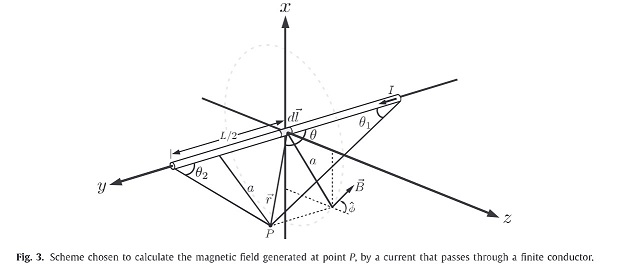

In [7]:
# For the first coil
#examplary naming: B_v_l : field from the vertical left line
def B_v_l(Imax, d, x, y, z):
    a_vl = np.sqrt((abs(y) - cwidth/2)**2 + (z + cham_d/2)**2)  
    cos1vl = (cwidth/2 + x)/np.sqrt((cwidth/2 + x)**2 + a_vl**2)
    cos2vl = (cwidth/2 - x)/np.sqrt((cwidth/2 - x)**2 + a_vl**2)
    B0_v = lay(d) * mu0 * Imax * (cos1vl + cos2vl) / (4 * np.pi * a_vl)
    B_vzl = B0_v * (cham_d/2 + z) / a_vl
    B_vyl = B0_v * (cwidth/2 - y) / a_vl
    return B_vzl * 1e3

def B_v_r(Imax, d, x, y, z):
    a_vr = np.sqrt((abs(y) - cwidth/2)**2 + (z + cham_d/2)**2)
    cos1vr = (cwidth/2 - x)/np.sqrt((cwidth/2 - x)**2 + a_vr**2)
    cos2vr = (cwidth/2 + x)/np.sqrt((cwidth/2 + x)**2 + a_vr**2)
    B0_vr = lay(d) *  mu0 * Imax * (cos1vr + cos2vr) / (4 * np.pi * a_vr)
    B_vzr = B0_vr * (cham_d/2 + z) / a_vr
    B_vyr = B0_vr * (cwidth/2 - y) / a_vr
    return B_vzr * 1e3

def B_h_t(Imax, d, x, y, z):
    a_ht = np.sqrt((abs(x) - cwidth/2)**2 + (z + cham_d/2)**2)
    cos1ht = (cwidth/2 + y)/np.sqrt((cwidth/2 + y)**2 + a_ht**2 )
    cos2ht = (cwidth/2 - y)/np.sqrt((cwidth/2 - y)**2 + a_ht**2 )
    B0_t = lay(d)  * mu0 * Imax * (cos2ht + cos1ht)/(4 * np.pi * a_ht)
    B_hz = B0_t *(cham_d/2 + z)/ a_ht
    B_hx = -B0_t *(cwidth/2 - x)/ a_ht   

    return B_hz*1e3


def B_h_b(Imax, d, x, y, z):
    a_hb = np.sqrt((abs(x) - cwidth/2)**2 + (z + cham_d/2)**2)
    cos1hb = (cwidth/2 - y)/np.sqrt((cwidth/2 - y)**2 + a_hb**2 )
    cos2hb = (cwidth/2 +y)/np.sqrt((cwidth/2 + y)**2 + a_hb**2 )
    B0_b = lay(d)* mu0* Imax *(cos1hb + cos2hb)/(4 * np.pi * a_hb)
    B_hzb = B0_b * (cham_d/2 + z)/a_hb
    B_hxb = B0_b * (cwidth/2- x)/a_hb  

    return  B_hzb*1e3

In [8]:
#The second one:
#* note: the second one is pretty similar to the first one

def B_h2_t(Imax, d, x, y, z):
    a_ht = np.sqrt((abs(x) - cwidth/2)**2 + (z - cham_d/2)**2)
    cos1ht = (cwidth/2 + y) / np.sqrt((cwidth/2 + y)**2 + a_ht**2)
    cos2ht = (cwidth/2 - y) / np.sqrt((cwidth/2 - y)**2 + a_ht**2)
    B0_t = lay(d) *  mu0 * Imax * (cos2ht + cos1ht) / (4 * np.pi * a_ht)
    B_hzt = B0_t * (cham_d/2 - z) / a_ht
    B_hx = B0_t * abs(x - cwidth/2) / a_ht  # Adjusted here
    return B_hzt * 1e3



def B_h2_b(Imax, d, x, y, z):
    a_hb = np.sqrt((abs(x) - cwidth/2)**2 + (z - cham_d/2)**2)
    cos1hb = (cwidth/2 - y) / np.sqrt((cwidth/2 - y)**2 + a_hb**2)
    cos2hb = (cwidth/2 + y) / np.sqrt((cwidth/2 + y)**2 + a_hb**2)
    B0_b = lay(d) *  mu0 * Imax * (cos1hb + cos2hb) / (4 * np.pi * a_hb)
    B_hzb = B0_b * (cham_d/2 - z) / a_hb
    B_hx = B0_b * abs(x - cwidth/2) / a_hb  # Adjusted here
    return B_hzb * 1e3



def B_v2_r(Imax, d, x, y, z):
    a_vr = np.sqrt((abs(y) - cwidth/2)**2 + (z - cham_d/2)**2)
    cos1vr = (cwidth/2 - x)/np.sqrt((cwidth/2 - x)**2 + a_vr**2 )
    cos2vr = (cwidth/2 + x)/np.sqrt((cwidth/2 + x)**2 + a_vr**2 )
    B0_vr = lay(d)* mu0 * Imax *(cos1vr + cos2vr)/(4*np.pi*a_vr)
    B_vzr = B0_vr*(cham_d/2-z)/a_vr
    B_vyr = B0_vr*(cwidth/2- y)/a_vr

    return   B_vzr*1e3


def B_v2_l(Imax, d, x, y, z):
    a_vl = np.sqrt((abs(y) - cwidth/2)**2 + (z - cham_d/2)**2)
    cos1vl = (cwidth/2 + x)/np.sqrt((cwidth/2 + x)**2 + a_vl**2 )
    cos2vl = (cwidth/2 - x)/np.sqrt((cwidth/2 - x)**2 + a_vl**2 )
    B0_v = lay(d)* mu0*Imax*(cos1vl + cos2vl)/(4 * np.pi *  a_vl)
    B_vzl = B0_v * (cham_d/2-z)/a_vl
    B_vyl = B0_v *(cwidth/2- y)/a_vl 
    
    return   B_vzl*1e3

In [9]:
#Define total magnetic field: 

def B_total(Imax, d, x, y , z):
    B_total = np.sqrt((B_h_t(Imax, d, x, y, z) + B_h2_t(Imax, d, x, y, z))**2 +\
                      (B_h_b(Imax, d, x, y, z) +  B_h2_b(Imax, d, x, y, z))**2 + \
                      (B_v_l(Imax, d, x, y, z) + B_v2_l(Imax, d, x, y, z)) **2 + \
                      (B_v_r(Imax, d, x, y, z) + B_v2_r(Imax, d, x, y, z))**2)
                      
    return B_total

Next, we draw magnetic field at coordination (0,0,0). 
Here we approximate the coil as multiple planes (each consisting of lay(d)) and calculate field for each and sum up. To do this, 
we use "for n in range (wind_l(d))"
And also, since distance between winds change as we add more turns, therefore I modified diameter of the chamber. 

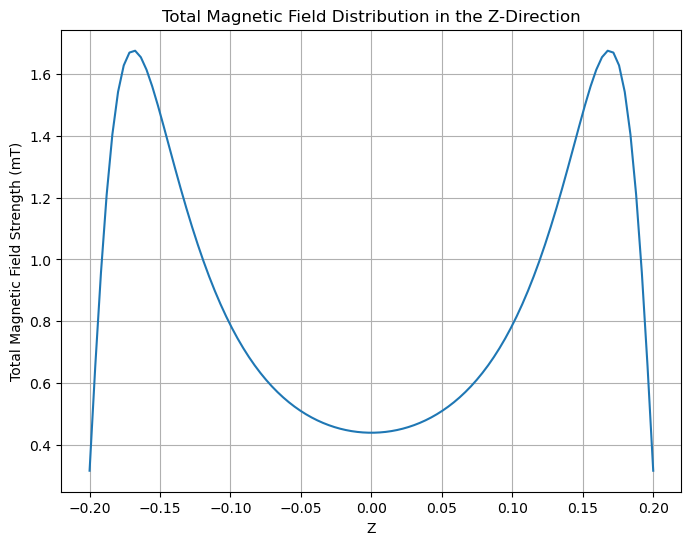

In [10]:
# Define values 
z_vals = np.linspace(-0.2, 0.2, 100)
Z = np.zeros_like(z_vals)  # Assume z = 0 for the plane
x = 0
y = 0
d = 0.00075

# Calculate the total magnetic field in the z-direction
B_total_z = np.zeros_like(z_vals)

for z_index, z_val in enumerate(z_vals):
    for n in range (wind_l(d)):                #this line is to consider the effect of winding. 
        cham_d = cham + 2*((n-1) * (d + inst))
        B_total_z[ z_index] = B_total(2.3, 0.00075, x, y, z_val )    # e.g. for Imax = 0.6 and d = 0.0006


coil = "Square_coil"
# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(z_vals, B_total_z)
plt.xlabel('Z')
plt.ylabel('Total Magnetic Field Strength (mT)')
plt.title('Total Magnetic Field Distribution in the Z-Direction')
plt.grid(True)

file_path = plot_save(directory, coil)  # Assuming plot_save function is defined elsewhere
plt.savefig(file_path)
plt.show()


This plot shows that field distribution is pretty symmetric over Z-direction. 
Now, we can test how field would chance as we play with current and diameter of wire. This test gives us a good overview to choose the write wire. Also, here we consider only point (0,0,0) since we are mainly interested to know about Magnetic field at the center where the chip is located. 

This plot shows that field distribution is pretty symmetric over Z-direction. Now, we can test how field would chance as we play with current and diameter of wire. This test gives us a good overview to choose the write wire. Also, here we consider only point (0,0,0) since we are mainly interested to know about Magnetic field at the center where the chip is located.

In [42]:
# Define the range of diameters (d) and currents (I)
d_vals = np.linspace(0.0003, 0.002, 100)
I_vals = np.linspace(0.02, 3, 100)

# Define coordination 
x = 0
y = 0
z= 0

# Calculate the total magnetic field as function of I and d
B_values = np.zeros((len(I_vals), len(d_vals)))

for n in range (wind_l(d)):
    cham_d = cham + 2*((n-1) * (d + inst))
    for i, I in enumerate(I_vals):
        for j, d in enumerate(d_vals):
            B_z = B_total(I, d, x, y, z)
            
            B_values[i, j] = B_z
            
 # Plot the magnetic field as a function of d and I
plt.figure(figsize=(10, 8))
plt.contourf(d_vals, I_vals, B_values, cmap='viridis')
plt.colorbar(label='Magnetic Field Strength (mT)')
plt.xlabel('Diameter (mm)')
plt.ylabel('Current (A)')
plt.title('Magnetic Field Strength at (0, 0, 0) as a Function of Diameter and Current')
plt.grid(True)
plt.savefig(file_path)
plt.show()
           

KeyboardInterrupt: 

To plot it in YZ plane: 

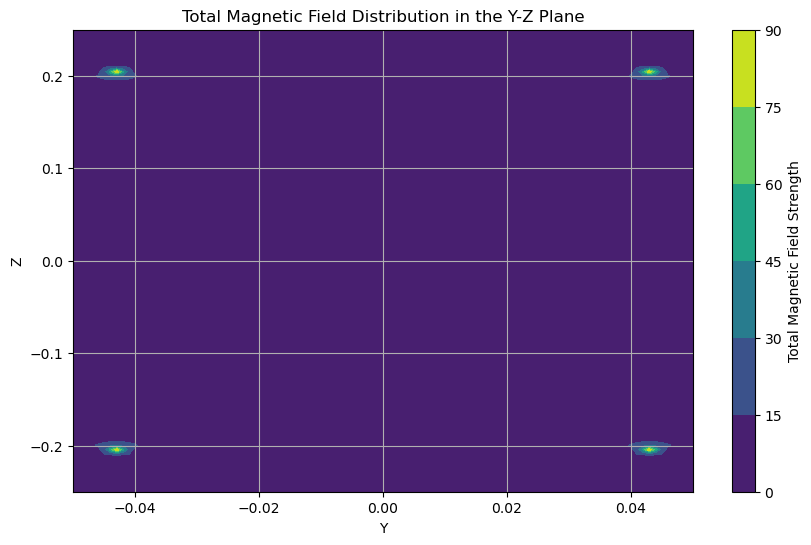

In [21]:
# Define parameters
#x_vals = np.linspace(-0.1, 0.2, 100)
y_vals = np.linspace(-0.05, 0.05, 100)
z_vals = np.linspace(-0.25, 0.25, 100)
x= 0

# Initialize array to store the total magnetic field
B_total_yz = np.zeros((len(y_vals), len(z_vals)))



# Calculate the total magnetic field in the Y-Z plane

for y_index, y_val in enumerate(y_vals):
    for z_index, z_val in enumerate(z_vals):
        for n in range (wind_l(d)):
            cham_d = cham + 2*((n-1) * (d + inst))
            B_total_yz[y_index, z_index] = B_total(1.2, 0.00063,x, y_val, z_val )

            
# Plot the result
Y, Z = np.meshgrid(y_vals, z_vals)
plt.figure(figsize=(10, 6))
plt.contourf(Y, Z, B_total_yz.T, cmap='viridis')
plt.colorbar(label='Total Magnetic Field Strength')
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Total Magnetic Field Distribution in the Y-Z Plane')
plt.grid(True)
plt.show()


We can also try to plot field distribution in XY plane: 

C:\Users\jparvizinejad\AppData\Local\Temp\ipykernel_4084\1080659396.py:6: RuntimeWarning: invalid value encountered in scalar divide
  cos1ht = (cwidth/2 + y) / np.sqrt((cwidth/2 + y)**2 + a_ht**2)
C:\Users\jparvizinejad\AppData\Local\Temp\ipykernel_4084\1080659396.py:18: RuntimeWarning: invalid value encountered in scalar divide
  cos2hb = (cwidth/2 + y) / np.sqrt((cwidth/2 + y)**2 + a_hb**2)
C:\Users\jparvizinejad\AppData\Local\Temp\ipykernel_4084\1080659396.py:39: RuntimeWarning: invalid value encountered in scalar divide
  cos1vl = (cwidth/2 + x)/np.sqrt((cwidth/2 + x)**2 + a_vl**2 )
C:\Users\jparvizinejad\AppData\Local\Temp\ipykernel_4084\1080659396.py:29: RuntimeWarning: invalid value encountered in scalar divide
  cos2vr = (cwidth/2 + x)/np.sqrt((cwidth/2 + x)**2 + a_vr**2 )
C:\Users\jparvizinejad\AppData\Local\Temp\ipykernel_4084\1080659396.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  B0_t = lay(d) *  mu0 * Imax * (cos2ht + cos1ht) / (4 * np.pi * a_ht)
C:

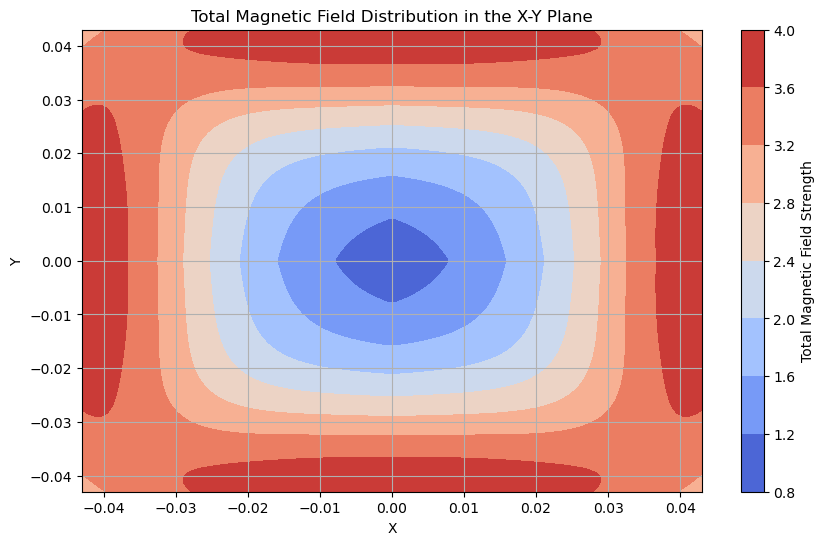

In [18]:
# Define parameters
x_vals = np.linspace(-0.043, 0.043, 100)
y_vals = np.linspace(-0.043, 0.043, 100)
#z_vals = np.linspace(-0.2, 0.2, 100)
z=0.18

# Initialize array to store the total magnetic field
B_total_xy = np.zeros((len(x_vals), len(y_vals)))



# Calculate the total magnetic field in the Y-Z plane

for x_index, x_val in enumerate(x_vals):
    for y_index, y_val in enumerate(y_vals):
        for n in range (wind_l(d)):
            cham_d = cham + 2*((n-1) * (d + inst))
            B_total_xy[x_index, y_index] = B_total(1.2, 0.00063, x_val, y_val, z)

            
# Plot the result
X, Y = np.meshgrid(x_vals, y_vals)
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, B_total_xy.T, cmap='coolwarm')
plt.colorbar(label='Total Magnetic Field Strength')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Total Magnetic Field Distribution in the X-Y Plane')
plt.grid(True)
plt.savefig(file_path)
plt.show()


And finally a 3d plot: 

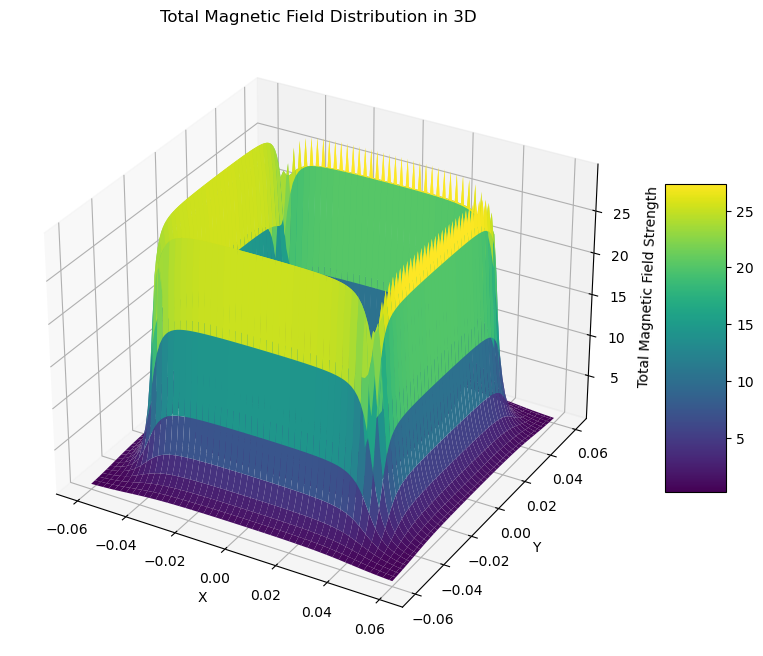

In [20]:
# Generate data
y_vals = np.linspace(-0.06, 0.06, 100)
x_vals = np.linspace(-0.06, 0.06, 100)
z_vals = np.linspace(-0.2, 0.2, 100)  # Range of Z values from 0 to 0.5
Y, X, Z = np.meshgrid(y_vals, x_vals, z_vals)
d = 0.00063

# Calculate the total magnetic field at each point in the y-x plane 
for n in range (wind_l(d)):
    cham_d/2 == cham/2 + ((n-1) * (d + inst))
    B_total_yx = np.zeros_like(Y)
    for i in range(len(y_vals)):
        for j in range(len(x_vals)):
            for k in range(len(z_vals)):
                B_total_yx[i, j, k] = B_total(1.0, 0.00063, X[i, j, k], Y[i, j, k], Z[i, j, k])

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X[:, :, 0], Y[:, :, 0], B_total_yx[:, :, 0], cmap='viridis', edgecolor='none')

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Total Magnetic Field Strength')
ax.set_title('Total Magnetic Field Distribution in 3D')

# Save the plot
plt.savefig(file_path)
# Show the plot
plt.show()


In order to realize how much energy and heat is generated in the center, we will solve equations for a range of diameter: 

In [22]:
# Define functions for magnetic field, power, and heat calculations
#def B_total(I, d, x, y, z):
    # Implementation for calculating total magnetic field
 #   pass

def eff_length(d):
    n_layer = int((cheight/d - 1) * sin(60 / 180 * pi) + 1)
    for n in range (n_layer):
        eff_length = wind(d) * (cwidth + 2*d)
    return eff_length


def R(d):
    A = (d/2)**2 * np.pi
    return rho * eff_length(d) / A

def P(I, d):
    return I**2 * R(d)

def heat(P, time):
    return P * time




# Define constants
rho = 1.7e-8  # Resistivity (ohm-m)
#Imax = 0.05  # Maximum current (A)
time = 1  # Time duration (hours)

# Define the range of diameters (d) and currents (I)
d_vals = np.linspace(0.001, 0.003, 50)
I_vals = np.linspace(1.5, 10, 50)

# Initialize lists to store data
magnetic_field_data = []
power_data = []
heat_data = []
current_data = []
diameter_data = []
length_data = []

# Calculate magnetic field, power, and heat for each combination of d and I
for n in range (wind_l(d)):
    cham_d/2 == cham/2 + ((n-1) * (d + inst))
    for I in I_vals:
        for d in d_vals:
        # Calculate total magnetic field at (0, 0, 0) for the given I and d
            B_val = B_total(I, d, 0, 0, 0)
        # Calculate power for the given diameter
            P_val = P(I, d)
        # Calculate heat for the given power and time
            heat_val = heat(P_val, time)
            length_val = eff_length(d)
        
        # Append the data to the respective lists
            magnetic_field_data.append(B_val)
            power_data.append(P_val)
            heat_data.append(heat_val)
            current_data.append(I)
            diameter_data.append(d)
            length_data.append(length_val)

# Create a DataFrame from the collected data
df = pd.DataFrame({
    'Current (A)': current_data,
    'Diameter (m)': diameter_data,
    'Magnetic Field (mT)': magnetic_field_data,
    'Power (W)': power_data,
    'Heat (J)': heat_data,
    'eff_l (m)': length_data
    
})

file_name = 'heat_data.xlsx'
file_path = os.path.join(directory, 'heat_data.xlsx')


# Export the DataFrame to an Excel file
df.to_excel(file_path, index=False)

print(df)


PermissionError: [Errno 13] Permission denied: 'C:/Users/jparvizinejad/Documents/work/Judi/Plot_coil\\heat_data.xlsx'

ValueError: Format 'xlsx' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

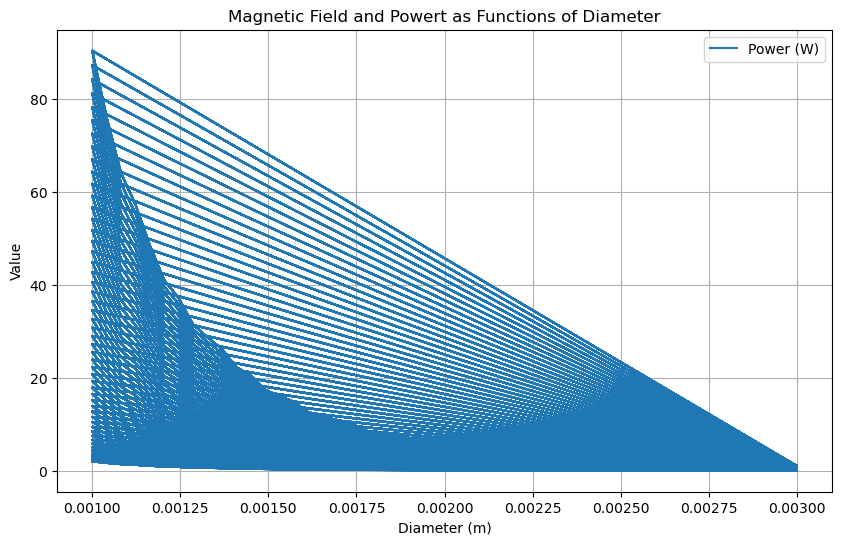

In [17]:
plt.figure(figsize=(10, 6))

# Plot magnetic field
#plt.plot(df['Diameter (m)'], df['Magnetic Field (mT)'], label='Magnetic Field (mT)')

# Plot power
plt.plot(df['Diameter (m)'], df['Power (W)'], label='Power (W)')

# Plot heat
#plt.plot(df['Diameter (m)'], df['Heat (J)'], label='Heat (J)')

plt.xlabel('Diameter (m)')
plt.ylabel('Value')
plt.title('Magnetic Field and Powert as Functions of Diameter')
plt.legend()
plt.grid(True)
plt.savefig(file_path)
plt.show()

In [43]:

def R(d):
    A = (d/2)**2 * np.pi
    return rho * eff_length(d) / A

def P(d):
    return Imax**2 * R(d)

def heat(P, time):
    return P * time

def eff_length(d):
    n_layer = int((cheight/d - 1) * sin(60 / 180 * pi) + 1)
    for n in range (n_layer):
        eff_length = wind(d) * (cwidth + 2*d)
    return eff_length


In [46]:
d = 0.00075
Imax = 2.5
rho = 1.7e-8
P(0.00075)

17.5365168777181

To validate the simulation using the reference paper, we can try regenerate magnetic field in their set up. To do so, we specify width of the coil as the distance between two coils. We regenrate fig.11m, which is field distribution in xy plane. 
length  = distance = 1 m
current = 0.5 A
wire_diameter = 1.02 mm
They have had 100 windings;


ValueError: Format 'xlsx' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

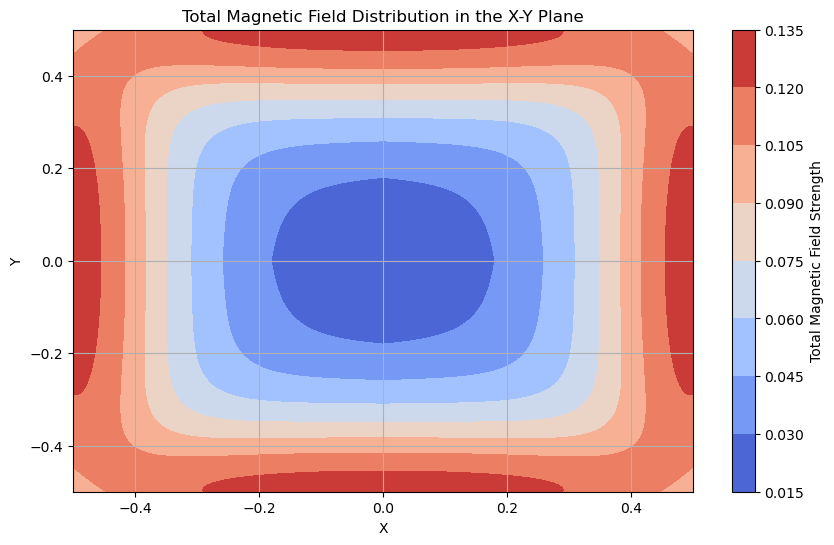

In [29]:
# Define parameters
x_vals = np.linspace(-0.5, 0.5, 700)
y_vals = np.linspace(-0.5, 0.5, 700)
z=0

d = 0.00102
chamd = 1 
cwidth = 1   # # Width of the square (mm)
cheight = 0.0105  #height of the coil up to where we can wind
clength = 0.0105   # length winding


# Initialize array to store the total magnetic field
B_total_xy = np.zeros((len(x_vals), len(y_vals)))



# Calculate the total magnetic field in the Y-Z plane

for x_index, x_val in enumerate(x_vals):
    for y_index, y_val in enumerate(y_vals):
        for n in range (wind_l(d)):
            cham_d = cham + 2*((n-1) * (d + inst))
            B_total_xy[x_index, y_index] = B_total(0.5, 0.00102, x_val, y_val, z)

            
# Plot the result
X, Y = np.meshgrid(x_vals, y_vals)
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, B_total_xy.T, cmap='coolwarm')
plt.colorbar(label='Total Magnetic Field Strength')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Total Magnetic Field Distribution in the X-Y Plane')
plt.grid(True)
plt.savefig(file_path)
plt.show()


As can be seen, the profile and magnitude are pretty close to what they report. 

And some more lines can be added to test magnetic field distribution generate by each part of the coil and at different points.
Let me know if you are inetested in knowing more! :) 